# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    # spaces in city names
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | yuxi
Processing Record 3 of Set 1 | la passe
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | sisimiut
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | pacific grove
Processing Record 10 of Set 1 | pariaman
Processing Record 11 of Set 1 | enewetak
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | pamandzi
Processing Record 15 of Set 1 | varberg
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | labuan
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | isle of lewis

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dalandzadgad,43.5708,104.4250,264.52,68,2,1.62,MN,1707371049
1,novo aripuana,-5.1206,-60.3797,298.55,84,85,0.45,BR,1707371049
2,vadso,70.0744,29.7487,258.24,85,75,2.57,NO,1707371049
3,saipan,15.1355,145.7010,301.54,65,40,7.20,MP,1707370978
4,port-aux-francais,-49.3500,70.2167,277.55,70,85,11.97,TF,1707371049


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dalandzadgad,43.5708,104.4250,264.52,68,2,1.62,MN,1707371049
1,novo aripuana,-5.1206,-60.3797,298.55,84,85,0.45,BR,1707371049
2,vadso,70.0744,29.7487,258.24,85,75,2.57,NO,1707371049
3,saipan,15.1355,145.7010,301.54,65,40,7.20,MP,1707370978
4,port-aux-francais,-49.3500,70.2167,277.55,70,85,11.97,TF,1707371049


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

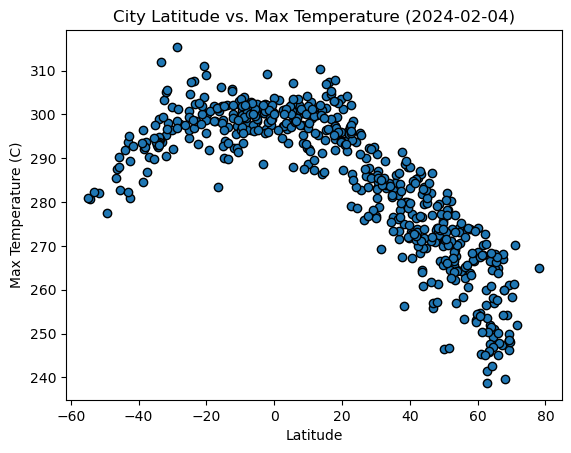

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-02-04)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

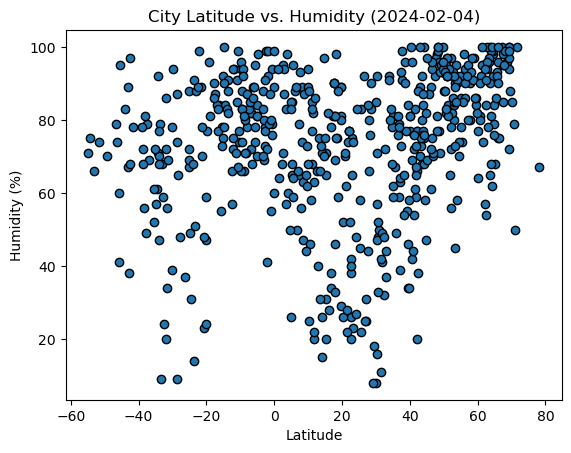

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-02-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

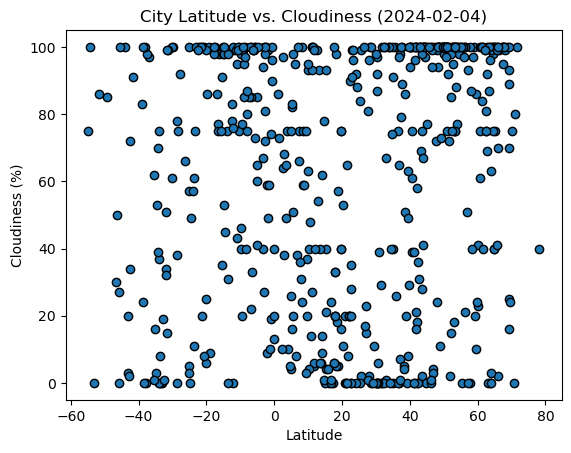

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-02-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

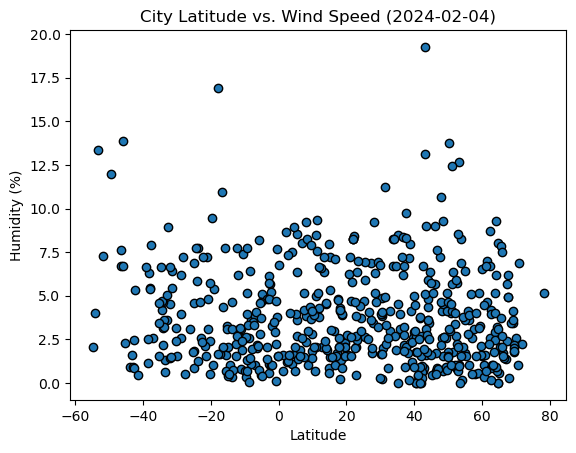

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-02-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def linreg(x, y, title, xlabel, ylabel):
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    result = linregress(x, y)
    plt.plot(x, result.intercept + result.slope*x, 'r')
    plt.annotate("y = {result.slope}x + {result.intercept}", xy =(100, 100))
    plt.show()
    return(f"The r-value is: {result.rvalue}")

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dalandzadgad,43.5708,104.4250,264.52,68,2,1.62,MN,1707371049
2,vadso,70.0744,29.7487,258.24,85,75,2.57,NO,1707371049
3,saipan,15.1355,145.7010,301.54,65,40,7.20,MP,1707370978
6,kondagaon,19.6000,81.6667,303.44,29,16,2.30,IN,1707371050
7,baotou,40.6522,109.8222,267.21,69,39,1.77,CN,1707371050


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,novo aripuana,-5.1206,-60.3797,298.55,84,85,0.45,BR,1707371049
4,port-aux-francais,-49.3500,70.2167,277.55,70,85,11.97,TF,1707371049
5,luena,-11.7833,19.9167,292.25,94,99,3.09,AO,1707371050
9,west island,-12.1568,96.8225,300.14,94,100,7.72,CC,1707371036
12,adamstown,-25.0660,-130.1015,294.65,88,100,4.57,PN,1707371051


###  Temperature vs. Latitude Linear Regression Plot

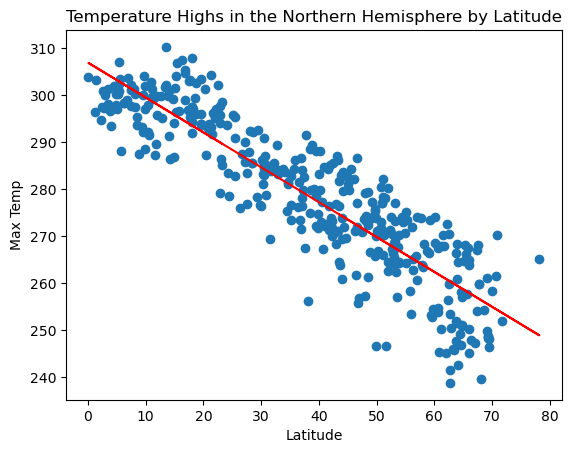

'The r-value is: -0.8941223894092915'

In [ ]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Temperature Highs in the Northern Hemisphere by Latitude", "Latitude", "Max Temp")

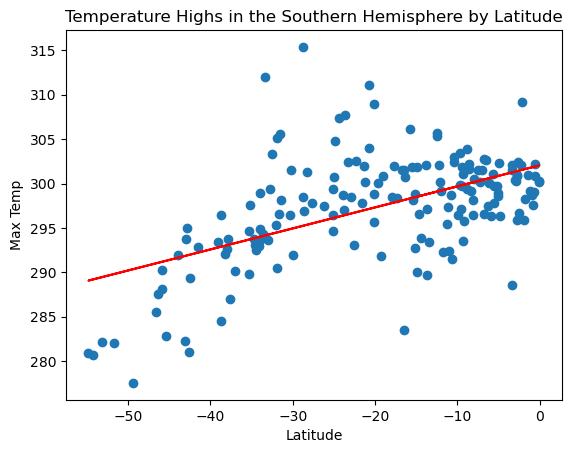

'The r-value is: 0.5432658551686986'

In [ ]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Temperature Highs in the Southern Hemisphere by Latitude", "Latitude", "Max Temp")

**Discussion about the linear relationship:** There is a strong correlation between latitude and maximum temperature. The further away the latitude is from zero, the lower the maximum temperature, and vice versa.

### Humidity vs. Latitude Linear Regression Plot

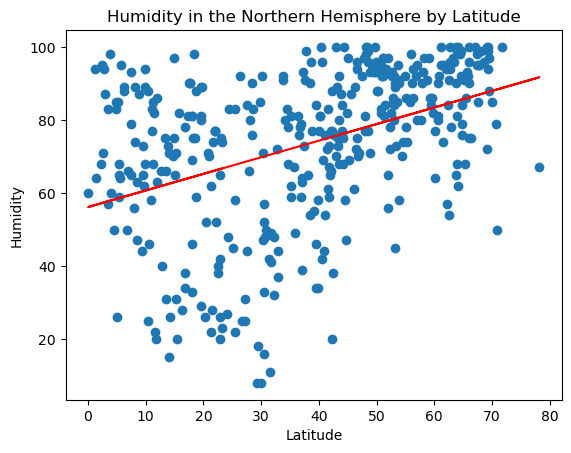

'The r-value is: 0.41095444688682775'

In [ ]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity in the Northern Hemisphere by Latitude", "Latitude", "Humidity")

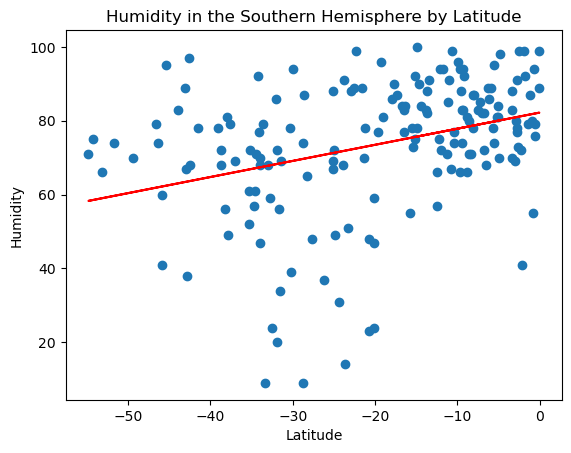

'The r-value is: 0.3334385328207019'

In [ ]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity in the Southern Hemisphere by Latitude", "Latitude", "Humidity")

**Discussion about the linear relationship:** The correlations in these plots appear to be fairly weak. Humidity slightly increase along with latitude in both plots.

### Cloudiness vs. Latitude Linear Regression Plot

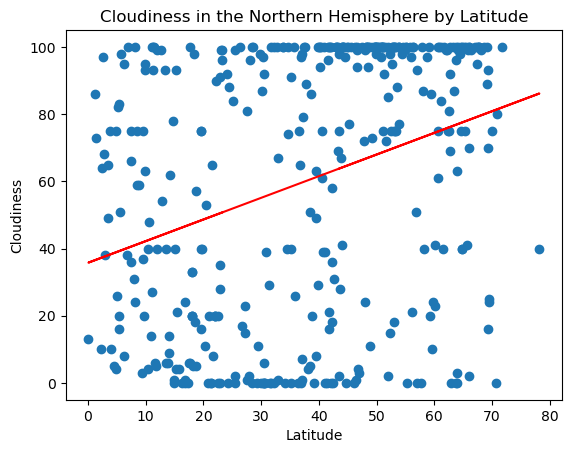

'The r-value is: 0.32033543820367455'

In [ ]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness in the Northern Hemisphere by Latitude", "Latitude", "Cloudiness")

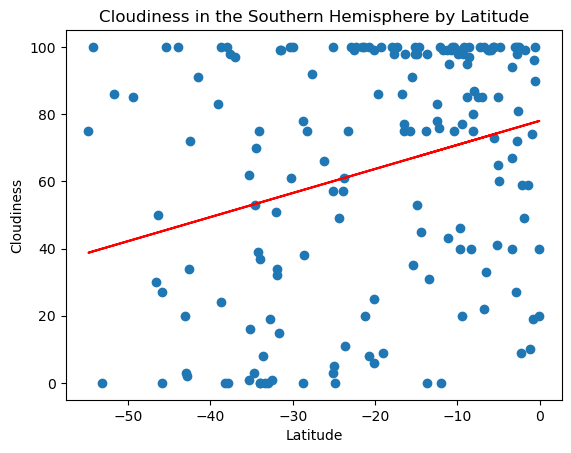

'The r-value is: 0.2830590871542065'

In [ ]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness in the Southern Hemisphere by Latitude", "Latitude", "Cloudiness")

**Discussion about the linear relationship:** These plots also have weak correlations. Cloudiness for cities seems to be very polarized, with many cities wither having 100% or 0% cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

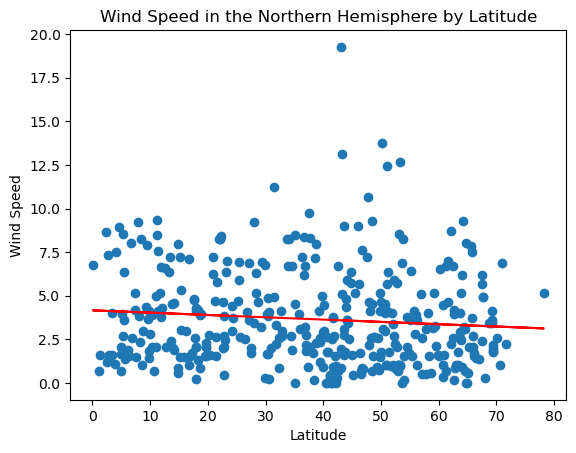

'The r-value is: -0.09408341262534858'

In [ ]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed in the Northern Hemisphere by Latitude", "Latitude", "Wind Speed")

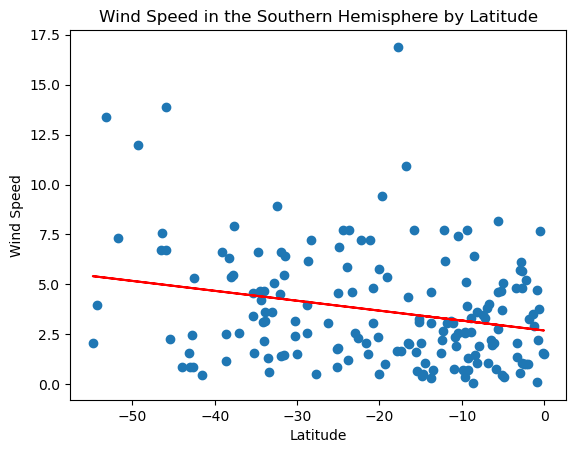

'The r-value is: -0.2495392632876326'

In [ ]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed in the Southern Hemisphere by Latitude", "Latitude", "Wind Speed")

**Discussion about the linear relationship:** There is a weak correlation between latitude and wind speed, where wind speed slightly slightly decreases with an increase in latitude.